In [1]:
# Kaggle Jupyter Notebook Style: MASt3R Installation & Test

# ✅ Step 1: Download Miniconda
!rm -rf Miniconda3-latest-Linux-x86_64.sh
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh

# ✅ Step 2: Install Miniconda
!rm -rf miniconda
!bash Miniconda3-latest-Linux-x86_64.sh -b -p /kaggle/working/miniconda/

# ✅ Step 3: Verify Python
!/kaggle/working/miniconda/bin/python -V
!/kaggle/working/miniconda/bin/which python

# ✅ Step 4: Create Conda Environment
!/kaggle/working/miniconda/bin/conda create -n mast3r_sfm python=3.11 cmake=3.14.0 -y
!/kaggle/working/miniconda/bin/conda env list

--2025-06-17 19:06:56--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155472915 (148M) [application/octet-stream]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>] 148.27M   125MB/s    in 1.2s    

2025-06-17 19:06:58 (125 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [155472915/155472915]

PREFIX=/kaggle/working/miniconda
Unpacking payload ...
entry_point.py:256: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
entry_point.py:256: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their meta

### ✅ Step 5: Write requirements.txt

In [2]:
%%writefile mast3r_sfm_pip_requirements.txt
torch<=2.4.0
torchvision<=0.17.0
--extra-index-url https://download.pytorch.org/whl/cu121

numpy<=1.26
roma
gradio
matplotlib
tqdm
opencv-python
scipy
einops
trimesh
tensorboard
pyglet<2
huggingface-hub[torch]>=0.22
scikit-learn
cython
faiss-cpu

Writing mast3r_sfm_pip_requirements.txt


### ✅ Step 6: Write install script

In [3]:
%%writefile mast3r_sfm_install_script.sh
cd /kaggle/working/
rm -rf mast3r
git clone --recursive https://github.com/naver/mast3r
cd mast3r
python -m pip install -r /kaggle/working/mast3r_sfm_pip_requirements.txt
rm -rf asmk
git clone https://github.com/jenicek/asmk
cd asmk/cython/
cythonize *.pyx
cd ..
python setup.py build_ext --inplace
cd ..
cd dust3r/croco/models/curope/
python setup.py build_ext --inplace
cd ../../../../

Writing mast3r_sfm_install_script.sh


In [4]:
# ✅ Step 7: Run install script
!/kaggle/working/miniconda/bin/conda run -n mast3r_sfm bash mast3r_sfm_install_script.sh

# ✅ Step 8: Download checkpoints
%cd /kaggle/working/mast3r
!mkdir -p checkpoints/
!wget https://download.europe.naverlabs.com/ComputerVision/MASt3R/MASt3R_ViTLarge_BaseDecoder_512_catmlpdpt_metric.pth -P checkpoints/
!wget https://download.europe.naverlabs.com/ComputerVision/MASt3R/MASt3R_ViTLarge_BaseDecoder_512_catmlpdpt_metric_retrieval_trainingfree.pth -P checkpoints/
!wget https://download.europe.naverlabs.com/ComputerVision/MASt3R/MASt3R_ViTLarge_BaseDecoder_512_catmlpdpt_metric_retrieval_codebook.pkl -P checkpoints/

Submodule path 'dust3r': checked out 'c9e9336a6ba7c1f1873f9295852cea6dffaf770d'
Submodule path 'dust3r/croco': checked out '743ee71a2a9bf57cea6832a9064a70a0597fcfcb'
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.1/799.1 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 124.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 118.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 79.4 MB/s eta 0:00:00
     ━━━━━━

### ✅ Step 9: Write test script

In [5]:
%%writefile test_mast3r_matching_1.py
from mast3r.model import AsymmetricMASt3R
from mast3r.fast_nn import fast_reciprocal_NNs

import mast3r.utils.path_to_dust3r
from dust3r.inference import inference
from dust3r.utils.image import load_images

import numpy as np
import torch
import cv2
from PIL import Image

device = 'cuda:0'
schedule = 'cosine'
lr = 0.01
niter = 300

model_name = "./checkpoints/MASt3R_ViTLarge_BaseDecoder_512_catmlpdpt_metric.pth"
model = AsymmetricMASt3R.from_pretrained(model_name).to(device)

images = load_images([
    'dust3r/croco/assets/Chateau1.png',
    'dust3r/croco/assets/Chateau2.png'
], size=512)

output = inference([tuple(images)], model, device, batch_size=1, verbose=False)

view1, pred1 = output['view1'], output['pred1']
view2, pred2 = output['view2'], output['pred2']

desc1 = pred1['desc'].squeeze(0).detach()
desc2 = pred2['desc'].squeeze(0).detach()

matches_im0, matches_im1 = fast_reciprocal_NNs(
    desc1, desc2, subsample_or_initxy1=8,
    device=device, dist='dot', block_size=2**13
)

# Ignore small border around the edge
H0, W0 = view1['true_shape'][0]
valid_matches_im0 = (
    (matches_im0[:, 0] >= 3) & (matches_im0[:, 0] < int(W0) - 3) &
    (matches_im0[:, 1] >= 3) & (matches_im0[:, 1] < int(H0) - 3)
)

H1, W1 = view2['true_shape'][0]
valid_matches_im1 = (
    (matches_im1[:, 0] >= 3) & (matches_im1[:, 0] < int(W1) - 3) &
    (matches_im1[:, 1] >= 3) & (matches_im1[:, 1] < int(H1) - 3)
)

valid_matches = valid_matches_im0 & valid_matches_im1
matches_im0 = matches_im0[valid_matches]
matches_im1 = matches_im1[valid_matches]

# Sample n_viz matches
n_viz = 20
num_matches = matches_im0.shape[0]
match_idx_to_viz = np.round(np.linspace(0, num_matches - 1, n_viz)).astype(int)
viz_matches_im0 = matches_im0[match_idx_to_viz]
viz_matches_im1 = matches_im1[match_idx_to_viz]

# Unnormalize and convert to uint8 BGR
image_mean = torch.tensor([0.5, 0.5, 0.5]).reshape(1, 3, 1, 1)
image_std = torch.tensor([0.5, 0.5, 0.5]).reshape(1, 3, 1, 1)

viz_imgs = []
for view in [view1, view2]:
    rgb = view['img'] * image_std + image_mean
    rgb = (rgb.squeeze(0).permute(1, 2, 0).cpu().numpy() * 255).astype(np.uint8)
    bgr = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR)
    viz_imgs.append(bgr)

# Match image sizes
H0, W0 = viz_imgs[0].shape[:2]
H1, W1 = viz_imgs[1].shape[:2]
img0 = cv2.copyMakeBorder(viz_imgs[0], 0, max(H1 - H0, 0), 0, 0, cv2.BORDER_CONSTANT, value=(0, 0, 0))
img1 = cv2.copyMakeBorder(viz_imgs[1], 0, max(H0 - H1, 0), 0, 0, cv2.BORDER_CONSTANT, value=(0, 0, 0))

concat_img = np.concatenate((img0, img1), axis=1)

# Draw matches
for i in range(n_viz):
    pt1 = tuple(viz_matches_im0[i].astype(int))
    pt2 = tuple(viz_matches_im1[i].astype(int) + np.array([W0, 0]))
    color = tuple(np.random.randint(0, 255, size=3).tolist())
    cv2.line(concat_img, pt1, pt2, color=color, thickness=2)
    cv2.circle(concat_img, pt1, 3, color, -1)
    cv2.circle(concat_img, pt2, 3, color, -1)

# Save result
final_rgb_img = cv2.cvtColor(concat_img, cv2.COLOR_BGR2RGB)
pil_image = Image.fromarray(final_rgb_img)
pil_image.save('/kaggle/working/mast3r/test_match_out.png')

Writing test_mast3r_matching_1.py


... loading model from ./checkpoints/MASt3R_ViTLarge_BaseDecoder_512_catmlpdpt_metric.pth
instantiating : AsymmetricMASt3R(enc_depth=24, dec_depth=12, enc_embed_dim=1024, dec_embed_dim=768, enc_num_heads=16, dec_num_heads=12, pos_embed='RoPE100',img_size=(512, 512), head_type='catmlp+dpt', output_mode='pts3d+desc24', depth_mode=('exp', -inf, inf), conf_mode=('exp', 1, inf), patch_embed_cls='PatchEmbedDust3R', two_confs=True, desc_conf_mode=('exp', 0, inf), landscape_only=False)
<All keys matched successfully>
>> Loading a list of 2 images
 - adding dust3r/croco/assets/Chateau1.png with resolution 224x224 --> 512x384
 - adding dust3r/croco/assets/Chateau2.png with resolution 224x224 --> 512x384
 (Found 2 images)



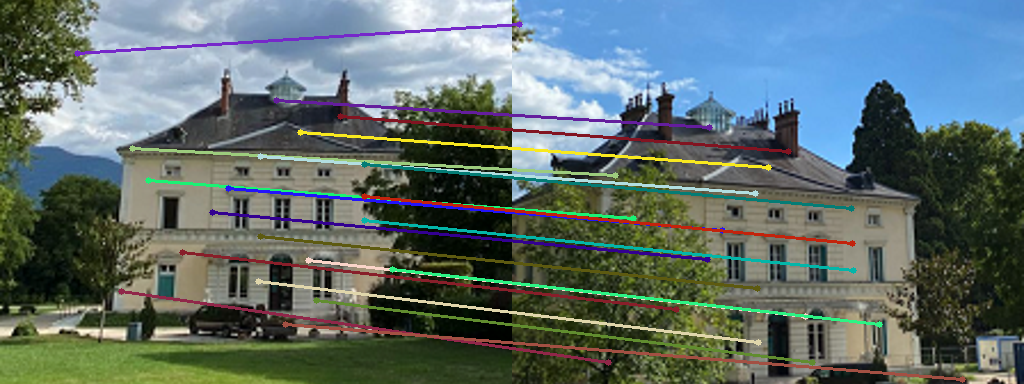

In [6]:

# ✅ Step 10: Run the test
!/kaggle/working/miniconda/bin/conda run -n mast3r_sfm python test_mast3r_matching_1.py

# ✅ Step 11: Show output
from PIL import Image
Image.open('/kaggle/working/mast3r/test_match_out.png')




In [7]:
# ✅ Step 12: Fix ASMK path
%cd /kaggle/working/mast3r
!mv asmk asmk_repo
!mv asmk_repo/asmk asmk
!ls -lh asmk



/kaggle/working/mast3r
total 252K
-rw-r--r-- 1 root root  11K Jun 17 19:11 asmk_method.py
-rw-r--r-- 1 root root 3.1K Jun 17 19:11 codebook.py
-rw-r--r-- 1 root root  502 Jun 17 19:11 functional.py
-rwxr-xr-x 1 root root 201K Jun 17 19:11 hamming.cpython-311-x86_64-linux-gnu.so
-rw-r--r-- 1 root root 1.6K Jun 17 19:11 index.py
-rw-r--r-- 1 root root  176 Jun 17 19:11 __init__.py
-rw-r--r-- 1 root root 6.0K Jun 17 19:11 inverted_file.py
-rw-r--r-- 1 root root 4.1K Jun 17 19:11 io_helpers.py
-rw-r--r-- 1 root root 3.1K Jun 17 19:11 kernel.py


In [8]:
# ✅ Step 13: Install extra tools
!/kaggle/working/miniconda/bin/conda run -n mast3r_sfm python -m pip install pycolmap kapture kapture_localization open3d==0.18.0



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 123.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.3/605.3 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 106.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 137.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 111.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 117.0 MB/s eta 0:00:00
  Attempting uninstall: werkzeug
    Found existing ins

In [9]:
# ✅ Step 14: Archive the environment
%cd /kaggle/working
!tar -czf miniconda.tar.gz ./miniconda/
!tar -czf mast3r.tar.gz ./mast3r/
!rm -rf ./miniconda/ ./mast3r/
!rm mast3r_sfm_install_script.sh mast3r_sfm_pip_requirements.txt Miniconda3-latest-Linux-x86_64.sh
!ls -lh

/kaggle/working
total 6.6G
-rw-r--r-- 1 root root 7.0K Jun 17 19:06 imc2025_mast3r_intall.py
-rw-r--r-- 1 root root 2.7G Jun 17 19:28 mast3r.tar.gz
-rw-r--r-- 1 root root 4.0G Jun 17 19:25 miniconda.tar.gz
---------- 1 root root 1.1M Jun 17 19:16 __notebook__.ipynb
